In [125]:
import numpy as np
import numpy.random as npr
import pandas as pd
import statsmodels.formula.api as smf

# from joblib import Parallel, delayed

pd.set_option("mode.copy_on_write", True)

In [168]:
N = 1_000
outcome = npr.normal(loc=0, scale=1, size=N)
treatment = npr.randint(0, 2, size=N)
example_data = pd.DataFrame({"y": outcome, "x": treatment})

In [169]:
model = smf.ols(formula="y ~ x", data=example_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7883
Date:                Tue, 03 Feb 2026   Prob (F-statistic):              0.375
Time:                        13:48:17   Log-Likelihood:                -1430.6
No. Observations:                1000   AIC:                             2865.
Df Residuals:                     998   BIC:                             2875.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0328      0.046      0.721      0.471      -0.057       0.122
x              0.0569      0.064      0.888      0.375      -0.069       0.183
==============================================================================
Omnibus:                        0.161   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.091
Skew:                          -0.012   Prob(JB):                        0.956
Kurtosis:                       3.040   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
p_values = list()
for i in range(1, N):
    data = example_data.iloc[0:i]
    model = smf.ols(formula="y ~ x", data=data).fit()
    p_values.append(model.pvalues["x"])

/var/folders/fs/h_8_rwsn5hvg9mhp0txgc_s9v6191b/T/ipykernel_63358/1465018204.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


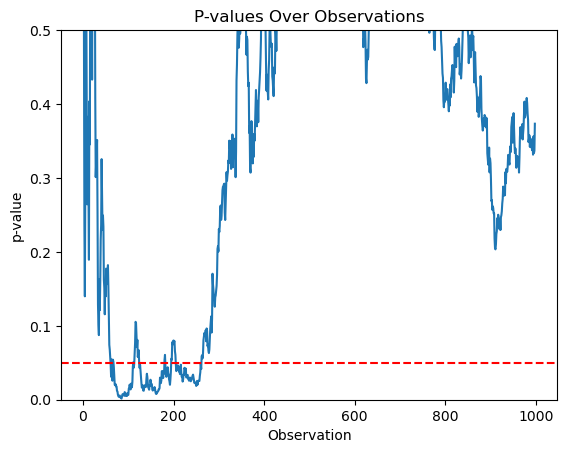

In [171]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(p_values)
ax.axhline(y=0.05, color="red", linestyle="--")
ax.set_ylim(0, 0.5)
ax.set_xlabel("Observation")
ax.set_ylabel("p-value")
ax.set_title("P-values Over Observations")
fig.show()

In [105]:
# More at scale:

N = 1_000_000


def run_regression(i):
    data = example_data.iloc[100:i]
    model = smf.ols(formula="y ~ x", data=data).fit()
    return (i, model.pvalues["x"])


p_values = Parallel(n_jobs=-1)(delayed(run_regression)(i) for i in range(101, N, 5))
pvalue_dataframe = pd.DataFrame(
    {"n": [p[0] for p in p_values], "pvalue": [p[1] for p in p_values]}
)

fig, ax = plt.subplots()
ax.plot(pvalue_dataframe["n"], pvalue_dataframe["pvalue"])
ax.axhline(y=0.05, color="red", linestyle="--")
ax.set_ylim(0, 0.5)
ax.set_xlabel("Observation")
ax.set_ylabel("p-value")
ax.set_title("P-values Over Observations")
fig.show()

KeyboardInterrupt: 